# Chapter 13: Introducing Network Analysis 

Thank you for checking out the code for: 

> Hogan, Bernie (2023) _From Social Science to Data Science_. London, UK: Sage Publications. 


Last updated: 20 October 2023 

This notebook contains the code from the book, along with the headers and additional author notes that are not in the book as a way to help navigate the code. You can run this notebook in a browser by clicking the buttons below. 
    
The version that is uploaded to GitHub should have all the results pasted, but the best way to follow along is to clear all outputs and then start afresh. To do this in Jupyter go the menu and select "Kernel -> Restart Kernel and Clear all Outputs...". To do this on Google Colab go to the menu and select "Edit -> Clear all outputs".
    
The most up-to-date version of this code can be found at https://www.github.com/berniehogan/fsstds 

Additional resources and teaching materials can be found on Sage's website for this book. 

All code for the book and derivative code on the book's repository is released open source under the  MIT license. 
    

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/berniehogan/fsstds/main?filepath=chapters%2FCh.13.NetworkAnalysis.ipynb)[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/berniehogan/fsstds/blob/main/chapters/Ch.13.NetworkAnalysis.ipynb)

## Doing network analysis in Python 

In [1]:
import networkx as nx
print(nx.__version__)

3.1


# Creating network graphs

In [4]:
g = nx.DiGraph(name="Demo")
print(g)

DiGraph named 'Demo' with 0 nodes and 0 edges


## Selecting a graph type 

## Adding nodes

In [5]:
nodes = ["Ali","Barb","Cam","Dot"]
edges = [("Ali","Barb"),
         ("Barb","Cam")]

g1 = nx.Graph()
g1.add_nodes_from(nodes)
g1.add_edges_from(edges)
print(f"{g1}:",g1.nodes)

g2 = nx.Graph(edges)
print(f"{g2}:", g2.nodes)

Graph with 4 nodes and 2 edges: ['Ali', 'Barb', 'Cam', 'Dot']
Graph with 3 nodes and 2 edges: ['Ali', 'Barb', 'Cam']


## Adding edges 

In [6]:
edges_list = [("Ali","Barb"),
              ("Barb","Cam"),
              ("Cam","Barb")]

g = nx.Graph(edges_list, name = "undirected")
dg = nx.DiGraph(edges_list, name = "directed")

print(g, dg, sep="\n")

Graph named 'undirected' with 3 nodes and 2 edges
DiGraph named 'directed' with 3 nodes and 3 edges


In [8]:
mult_edges = [("Ali","Barb",1),
             ("Barb","Cam",1),
             ("Barb","Cam",2),
             ("Cam","Barb",3)]

try: g = nx.Graph(mult_edges)
except: print("Not a valid edge list for uniplex graphs.")

mg = nx.MultiGraph(mult_edges)
mdg = nx.MultiDiGraph(mult_edges)

print(mg, mdg, sep="\n")

Not a valid edge list for uniplex graphs.
MultiGraph with 3 nodes and 4 edges
MultiDiGraph with 3 nodes and 4 edges


# Adding attributes

In [11]:
g = nx.DiGraph([("Ali","Barb"),("Barb","Cam"), ("Cam","Barb")], 
             name="label example",
             demovar="demo_1")

g.nodes["Ali"]["weight"] = 32
g.edges["Ali","Barb"]["type"] = "friend"
g.edges["Ali","Barb"]["weight"] = 30
g.edges["Ali","Barb"]["weight"] = 50

print("g:\t\t\t",g)
print("g.graph:\t\t", g.graph)
print("g['Ali']:\t\t", g["Ali"])
print("g.nodes['Ali']:\t\t",g.nodes["Ali"])
print("g.edges['Ali','Barb']:\t", g.edges["Ali","Barb"])


g:			 DiGraph named 'label example' with 3 nodes and 3 edges
g.graph:		 {'name': 'label example', 'demovar': 'demo_1'}
g['Ali']:		 {'Barb': {'type': 'friend', 'weight': 50}}
g.nodes['Ali']:		 {'weight': 32}
g.edges['Ali','Barb']:	 {'type': 'friend', 'weight': 50}


## Working with distributions of attributes: The case of Degree

In [12]:
print(g.degree(),g.in_degree(),g.out_degree(),sep="\n")

[('Ali', 1), ('Barb', 3), ('Cam', 2)]
[('Ali', 0), ('Barb', 2), ('Cam', 1)]
[('Ali', 1), ('Barb', 1), ('Cam', 1)]


In [13]:
for node_id,score in g.out_degree():
    g.nodes[node_id]["out-degree"] = score

for node_id,score in g.in_degree():
    g.nodes[node_id]["in-degree"] = score

In [14]:
import pandas as pd 

In [15]:
node_data = {"Ali":{"age":32,"travel":"cycling"},
             "Barb":{"age":28,"travel":"walking"},
             "Cam":{"age":43,"travel":"bus"}}

df = pd.DataFrame.from_dict(node_data,orient="index")
df

,age,travel
Ali,32,cycling
Barb,28,walking
Cam,43,bus


In [16]:
for index, val in df["age"].items():
    g.nodes[index]["age"] = val

g.nodes["Ali"]["age"] # Just spot checking

32

In [17]:
display(pd.DataFrame.from_dict(g.nodes,orient="index"))

,weight,out-degree,in-degree,age
Ali,32.0,1,0,32
Barb,NaN,1,2,28
Cam,NaN,1,1,43


# Plotting a graph 

In [18]:
g = nx.Graph([("a","b"),("b","c"),("c","a"),("a","d")])
print(g)

Graph with 4 nodes and 4 edges


In [19]:
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'svg'

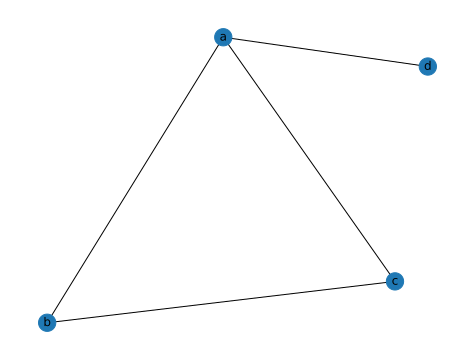

In [20]:
nx.draw_random(g,with_labels=True)

plt.show()

In [21]:
g = nx.generators.binomial_graph(50,.05,seed=1979)
print(g)

Graph with 50 nodes and 60 edges


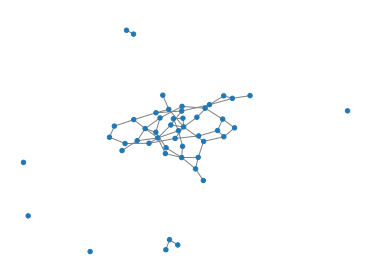

In [22]:
pos = nx.spring_layout(g)

nx.draw_networkx_nodes(g,pos,node_size=20)
nx.draw_networkx_edges(g,pos,edge_color="grey")
plt.axis("off")
plt.show()

In [23]:
largest_comp_nodes = max(sorted(nx.connected_components(g),
                                key=len, reverse=True))

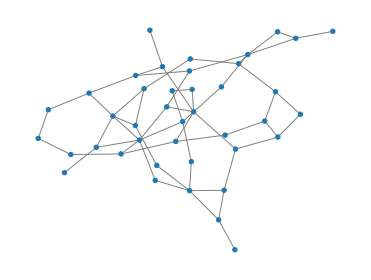

In [27]:
lcc = g.subgraph(largest_comp_nodes)

nx.draw_networkx_nodes(lcc,pos,node_size=20)
nx.draw_networkx_edges(lcc,pos,edge_color="grey")
plt.axis("off")
plt.show()

## Considering layouts for a graph

In [28]:
kg = nx.karate_club_graph()
print(kg)
print(kg.nodes[0])

Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
{'club': 'Mr. Hi'}


In [29]:
from collections import defaultdict

In [30]:
clubs = defaultdict(list)

for node in kg.nodes: 
    clubs[kg.nodes[node]["club"]].append(node)

for club, members in clubs.items(): 
    print(f"Club {club} has {len(members)} members") 

Club Mr. Hi has 17 members
Club Officer has 17 members


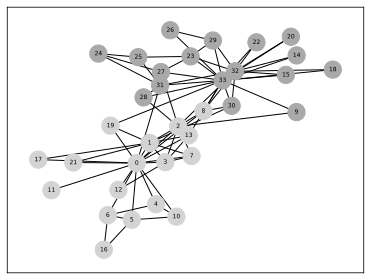

In [61]:
pos = nx.spring_layout(kg)

nx.draw_networkx_nodes(kg.subgraph(clubs["Mr. Hi"]), pos,
                      node_color="lightgrey")

nx.draw_networkx_nodes(kg.subgraph(clubs["Officer"]), pos,
                      node_color="darkgrey")

nx.draw_networkx_edges(kg,pos)

nx.draw_networkx_labels(kg,pos,
                        font_size=6)
plt.show()

# Subgroups and communities in a network 

In [33]:
import networkx.algorithms.community as nx_comm 

In [34]:
greedy_comm = nx_comm.greedy_modularity_communities(kg) 

for c,i in enumerate(greedy_comm):
    print(f"Community {c} has {len(i)} members")

Community 0 has 17 members
Community 1 has 9 members
Community 2 has 8 members


In [35]:
greedy_mod = nx_comm.modularity(kg, greedy_comm)
print(f"Using an algorithm, modularity was: {greedy_mod:0.2f}")

attr_mod = nx_comm.modularity(kg, list(clubs.values()))
print(f"Using the clubs, modularity was: {attr_mod:0.2f}")

Using an algorithm, modularity was: 0.41
Using the clubs, modularity was: 0.39


# Creating a network from data

In [36]:
import pickle
from pathlib import Path

# V1.1 Code - Deprecated

# If you have a pickle for a Stack Exchange you can use this, but I 
# Recommend redownloading the Ch.00.StackExchangeDownloader
# And creating a file in feather.

# data_dir = Path().cwd().parent / "data"
# pickle_file = data_dir / <your_se_folder> / "movies_stack_df.pkl"

# if pickle_file.exists():
#     stack_df = pickle.load(open(pickle_file ,'rb'))
#     print(len(stack_df))
# else:
#     print("Please download and clean the Stack_df data as per Chpater 10.",
#           "See data from https://archive.org/download/stackexchange .")
#
# stack_df.rename(columns={'ListTags':'TagsList'})

stack_name = "movies"

data_dir = Path.cwd().parent / "data" / f"{stack_name}.stackexchange.com"

stack_df = pd.read_feather(data_dir / "Posts.feather")

In [38]:
question_mask = stack_df.PostTypeId =='1'
answer_mask = stack_df.PostTypeId =='2'

# Only questions have tags and I will want them later.
thin_df = stack_df[question_mask][["Id","OwnerUserId","TagsList"]]
thin_df

,Id,OwnerUserId,TagsList
0,1,11,[wedding-crashers]
2,3,41,"[analysis, star-wars]"
3,4,22,"[comedy, the-pink-panther]"
4,6,34,"[plot-explanation, analysis, ending, the-tree-..."
6,10,11,"[plot-explanation, the-departed]"
...,...,...,...
64034,120924,77804,[breaking-bad]
64036,120926,62108,[home-improvement]
64046,120936,101841,"[dialogue, donnie-brasco]"
64048,120938,63484,[film-industry]


In [39]:
answer_df = stack_df[answer_mask].merge(thin_df,
              left_on="ParentId",right_on="Id",
              how="left", suffixes=["","-q"])

# Remove deleted accounts where only content remains
answer_df.dropna(subset = ["OwnerUserId","OwnerUserId-q"],inplace = True)

display(answer_df[["OwnerUserId","ParentId","OwnerUserId-q"]]
        .sample(5,random_state=1984))

,OwnerUserId,ParentId,OwnerUserId-q
4866,5589,15357,6825
25202,62795,86344,56959
31787,23547,92438,57318
7064,1507,23449,12880
32085,31426,107339,79618


In [41]:
stack_edgelist = list(zip(answer_df["OwnerUserId"],
                          answer_df["OwnerUserId-q"]))

# print(stack_edgelist)
g = nx.DiGraph(stack_edgelist)
print(g)

DiGraph with 14502 nodes and 30317 edges


## Whole networks versus partial networks

In [43]:
tag = "dialogue"
tag_mask = answer_df['TagsList-q'].map(lambda x: "dialogue" in x)
len(answer_df[tag_mask])

1417

## Weighted networks

In [44]:
print(len(stack_edgelist))
print(len(pd.Series(stack_edgelist).unique()))

34766
30317


In [45]:
weight_ser = pd.Series(stack_edgelist).value_counts()
wg = nx.DiGraph(name="Weighted Directed Reply Graph")

ebunch = []
for nodes,weight in weight_ser.items():
    if weight >= 5 and nodes[0] != nodes[1]:
        ebunch.append((nodes[0],nodes[1],weight))

wg.add_weighted_edges_from(ebunch)
print(wg)

DiGraph named 'Weighted Directed Reply Graph' with 125 nodes and 242 edges


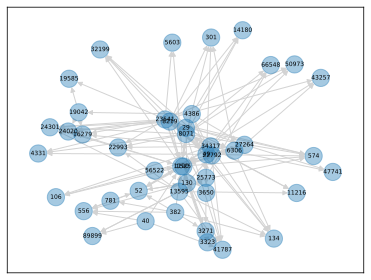

In [48]:
filter_graph = wg.subgraph([node for node,val in wg.degree() if val > 2])

pos = nx.spring_layout(filter_graph)
nx.draw_networkx_nodes(filter_graph,pos,alpha=0.4)
nx.draw_networkx_edges(filter_graph,pos,edge_color="lightgrey")
nx.draw_networkx_labels(filter_graph,pos,font_size=6)

plt.show()

## Bipartite networks

In [49]:
stack_df[question_mask][["OwnerUserId","TagsList"]].head()

,OwnerUserId,TagsList
0,11,[wedding-crashers]
2,41,"[analysis, star-wars]"
3,22,"[comedy, the-pink-panther]"
4,34,"[plot-explanation, analysis, ending, the-tree-..."
6,11,"[plot-explanation, the-departed]"


In [50]:
tags_df = (stack_df[question_mask][["OwnerUserId","TagsList"]]
           .explode("TagsList").dropna())

display(tags_df.head())

,OwnerUserId,TagsList
0,11,wedding-crashers
2,41,analysis
2,41,star-wars
3,22,comedy
3,22,the-pink-panther


In [51]:
print(tags_df.shape)

(45186, 2)


In [52]:
in_common = set(tags_df["OwnerUserId"]) & set(tags_df["TagsList"])
print(f"The sets have {len(in_common)} elements in common")

The sets have 0 elements in common


In [53]:
top40_tags = list(tags_df["TagsList"].value_counts().index[:40])
tag_filtered_df = tags_df[tags_df["TagsList"].map(lambda x: x in top40_tags)]
print(f"All rows: {len(tags_df)}")
print(f"Rows counting only top 40 tags: {len(tag_filtered_df)}")

All rows: 45186
Rows counting only top 40 tags: 23262


In [54]:
bp_tag_list = list(zip(tag_filtered_df["OwnerUserId"],
                       tag_filtered_df["TagsList"]))

tagg = nx.Graph(bp_tag_list)
print(tagg)

Graph with 5981 nodes and 12640 edges


In [55]:
from networkx.algorithms import bipartite as bp 

bp.is_bipartite(tagg)

True

In [56]:
bp_lvl1,bp_lvl2 =  nx.bipartite.sets(tagg)
print(len(bp_lvl1),len(bp_lvl2))

lvl2g = bp.weighted_projected_graph(tagg, bp_lvl2)
print(lvl2g)

5941 40
Graph with 40 nodes and 780 edges


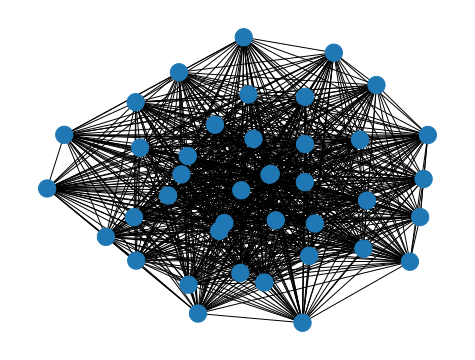

In [57]:
nx.draw_spring(lvl2g)

plt.show()

In [58]:
keep_list = []
for edge in lvl2g.edges: 
    if lvl2g.edges[edge]["weight"] >= 50: 
        keep_list.append(edge)

print(len(lvl2g.edges),len(keep_list))

780 111


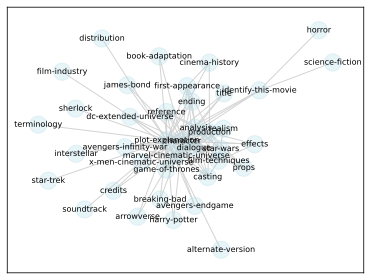

In [59]:
lvl2g_sub = lvl2g.edge_subgraph(keep_list)

pos = nx.spring_layout(lvl2g_sub)

nx.draw_networkx_nodes(lvl2g_sub,pos,node_color="lightblue",alpha=0.3)
nx.draw_networkx_edges(lvl2g_sub,pos,edge_color="lightgrey")
nx.draw_networkx_labels(lvl2g_sub,pos,font_size=8)

plt.show()

In [60]:
nx.write_graphml(tagg, data_dir / f"bipartite_tagdata {stack_name} stack.graphml")
newg = nx.read_graphml(data_dir / f"bipartite_tagdata {stack_name} stack.graphml")
print(newg)

Graph with 5981 nodes and 12640 edges


# Summary

# Further reading 

# Extending and reflecting 